# Exploratory Data Analysis - Cancer Patient Dataset

This notebook performs a comprehensive EDA on the cancer patient dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
import os

print(os.getcwd())


C:\Users\teaga\Desktop\mlops\notebooks


In [3]:
# Load the data
df = pd.read_csv('../data/raw/lung_cancer.csv')

print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"Shape: {df.shape} (rows, columns)")
print(f"\nColumn Names ({len(df.columns)} total):")
print(df.columns.tolist())
df.head()

DATASET OVERVIEW
Shape: (1000, 26) (rows, columns)

Column Names (26 total):
['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring', 'Level']


,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [4]:
# Data Types and Missing Values
print("=" * 60)
print("DATA TYPES AND MISSING VALUES")
print("=" * 60)
print("\nData Types:")
print(df.dtypes)
print(f"\nMissing Values:")
missing = df.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print("No missing values found!")
print(f"\nTotal missing values: {missing.sum()}")

DATA TYPES AND MISSING VALUES

Data Types:
index                        int64
Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

Missing Values:
No missing value

In [5]:
# Summary Statistics
print("=" * 60)
print("SUMMARY STATISTICS")
print("=" * 60)
df.describe()

SUMMARY STATISTICS


,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


TARGET VARIABLE ANALYSIS (Level)

Count by Level:
Level
High      365
Medium    332
Low       303
Name: count, dtype: int64

Percentage distribution:
Level
High      36.5
Medium    33.2
Low       30.3
Name: proportion, dtype: float64


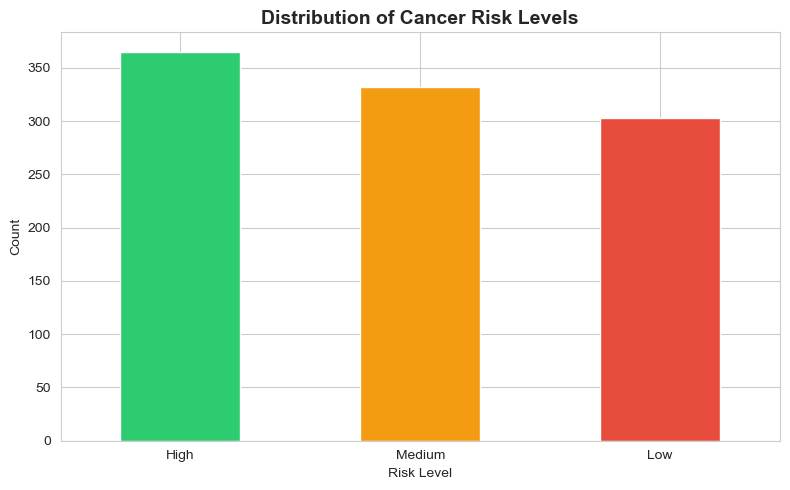

In [6]:
# Target Variable Analysis
print("=" * 60)
print("TARGET VARIABLE ANALYSIS (Level)")
print("=" * 60)
if 'Level' in df.columns:
    print("\nCount by Level:")
    print(df['Level'].value_counts())
    print(f"\nPercentage distribution:")
    print(df['Level'].value_counts(normalize=True) * 100)
    
    # Visualization
    plt.figure(figsize=(8, 5))
    df['Level'].value_counts().plot(kind='bar', color=['#2ecc71', '#f39c12', '#e74c3c'])
    plt.title('Distribution of Cancer Risk Levels', fontsize=14, fontweight='bold')
    plt.xlabel('Risk Level')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

AGE STATISTICS

Age Statistics:
count    1000.000000
mean       37.174000
std        12.005493
min        14.000000
25%        27.750000
50%        36.000000
75%        45.000000
max        73.000000
Name: Age, dtype: float64

Age Range: 14 - 73


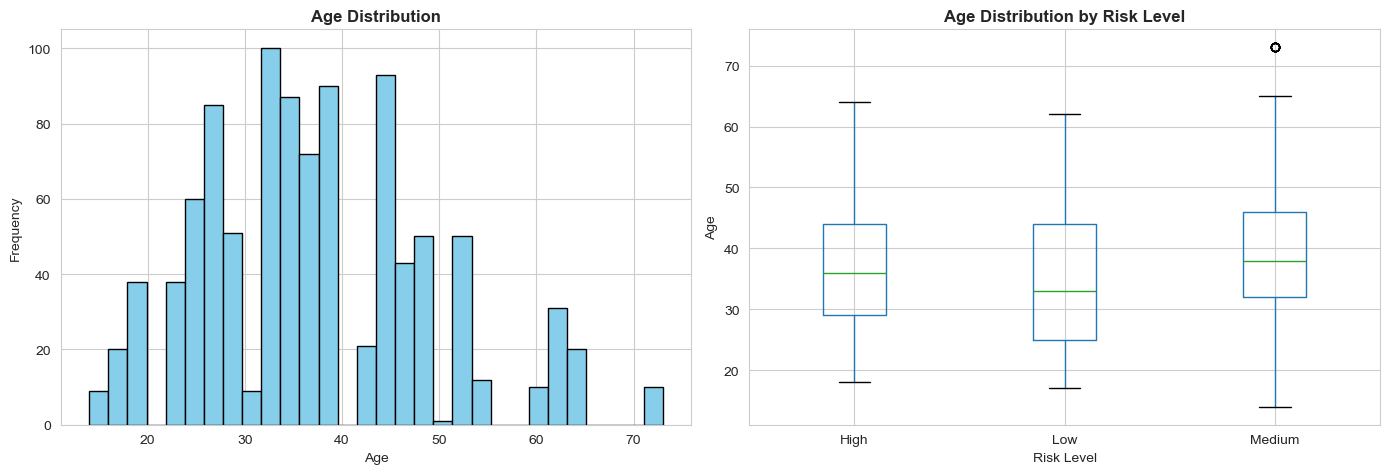

In [7]:
# Age Analysis
print("=" * 60)
print("AGE STATISTICS")
print("=" * 60)
if 'Age' in df.columns:
    print(f"\nAge Statistics:")
    print(df['Age'].describe())
    print(f"\nAge Range: {df['Age'].min()} - {df['Age'].max()}")
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogram
    df['Age'].hist(bins=30, color='skyblue', edgecolor='black', ax=axes[0])
    axes[0].set_title('Age Distribution', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Age')
    axes[0].set_ylabel('Frequency')
    
    # Boxplot by Level
    if 'Level' in df.columns:
        df.boxplot(column='Age', by='Level', ax=axes[1])
        axes[1].set_title('Age Distribution by Risk Level', fontsize=12, fontweight='bold')
        axes[1].set_xlabel('Risk Level')
        axes[1].set_ylabel('Age')
        plt.suptitle('')
    
    plt.tight_layout()
    plt.show()

GENDER DISTRIBUTION
Gender
1    598
2    402
Name: count, dtype: int64

Note: Gender appears to be encoded (1 or 2)


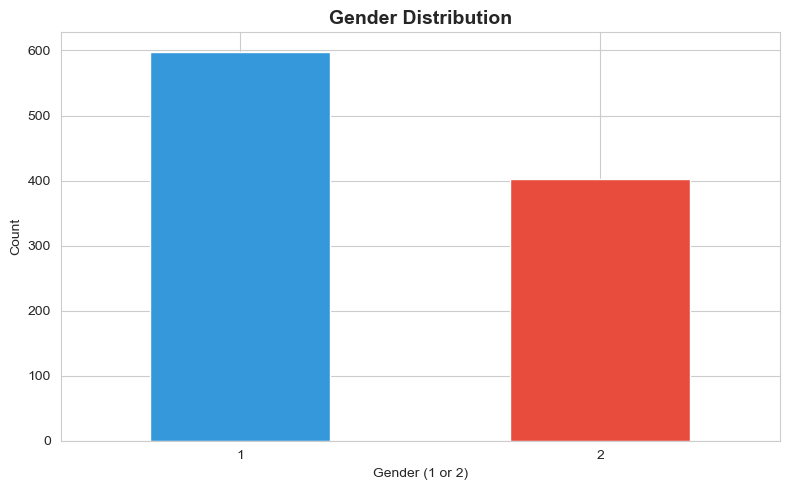

In [8]:
# Gender Analysis
print("=" * 60)
print("GENDER DISTRIBUTION")
print("=" * 60)
if 'Gender' in df.columns:
    print(df['Gender'].value_counts())
    print(f"\nNote: Gender appears to be encoded (1 or 2)")
    
    # Visualization
    plt.figure(figsize=(8, 5))
    df['Gender'].value_counts().plot(kind='bar', color=['#3498db', '#e74c3c'])
    plt.title('Gender Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Gender (1 or 2)')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [9]:
# Risk Factors Analysis
print("=" * 60)
print("RISK FACTORS OVERVIEW")
print("=" * 60)

risk_factors = ['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 
                'Genetic Risk', 'chronic Lung Disease', 'Obesity', 'Smoking', 
                'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 
                'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty',
                'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring']

# Check which risk factors exist in the dataset
existing_risk_factors = [col for col in risk_factors if col in df.columns]
print(f"Found {len(existing_risk_factors)} risk factor columns")
print(f"\nRisk Factor Statistics:")
print(df[existing_risk_factors].describe())

RISK FACTORS OVERVIEW
Found 20 risk factor columns

Risk Factor Statistics:
       Air Pollution  Alcohol use  Dust Allergy  OccuPational Hazards  \
count      1000.0000  1000.000000   1000.000000           1000.000000   
mean          3.8400     4.563000      5.165000              4.840000   
std           2.0304     2.620477      1.980833              2.107805   
min           1.0000     1.000000      1.000000              1.000000   
25%           2.0000     2.000000      4.000000              3.000000   
50%           3.0000     5.000000      6.000000              5.000000   
75%           6.0000     7.000000      7.000000              7.000000   
max           8.0000     8.000000      8.000000              8.000000   

       Genetic Risk  chronic Lung Disease      Obesity      Smoking  \
count   1000.000000           1000.000000  1000.000000  1000.000000   
mean       4.580000              4.380000     4.465000     3.948000   
std        2.126999              1.848518     2.12492

CORRELATION ANALYSIS


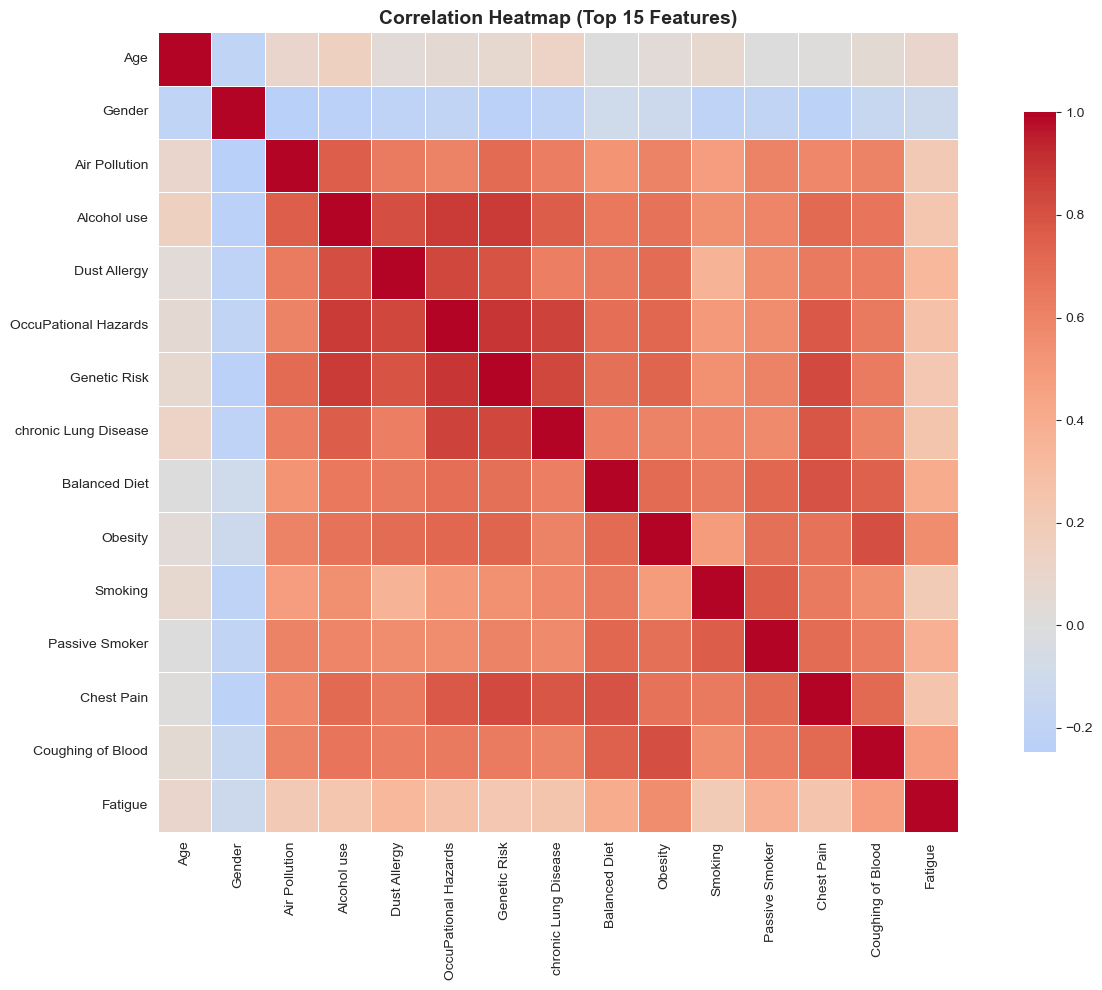

In [10]:
# Correlation Heatmap
print("=" * 60)
print("CORRELATION ANALYSIS")
print("=" * 60)

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Remove index and Patient Id if they exist
if 'index' in numeric_cols:
    numeric_cols.remove('index')
if 'Patient Id' in df.columns:
    # Patient Id is likely string, but check
    pass

# Select top 15 numeric columns for better visualization
cols_to_plot = numeric_cols[:15] if len(numeric_cols) > 15 else numeric_cols

plt.figure(figsize=(14, 10))
corr_matrix = df[cols_to_plot].corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap (Top 15 Features)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

AVERAGE RISK FACTOR SCORES BY LEVEL
        Air Pollution  Alcohol use  Dust Allergy  OccuPational Hazards  \
Level                                                                    
High             5.69         6.83          6.62                  6.48   
Low              2.60         2.23          3.11                  3.00   
Medium           2.93         4.20          5.44                  4.72   

        Genetic Risk  chronic Lung Disease  Obesity  Smoking  Passive Smoker  \
Level                                                                          
High            6.38                  5.83     6.68     6.07            6.53   
Low             2.73                  3.09     2.41     3.02            2.63   
Medium          4.29                  3.96     3.90     2.45            3.05   

        Chest Pain  
Level               
High          6.39  
Low           2.83  
Medium        3.75  


<Figure size 1400x600 with 0 Axes>

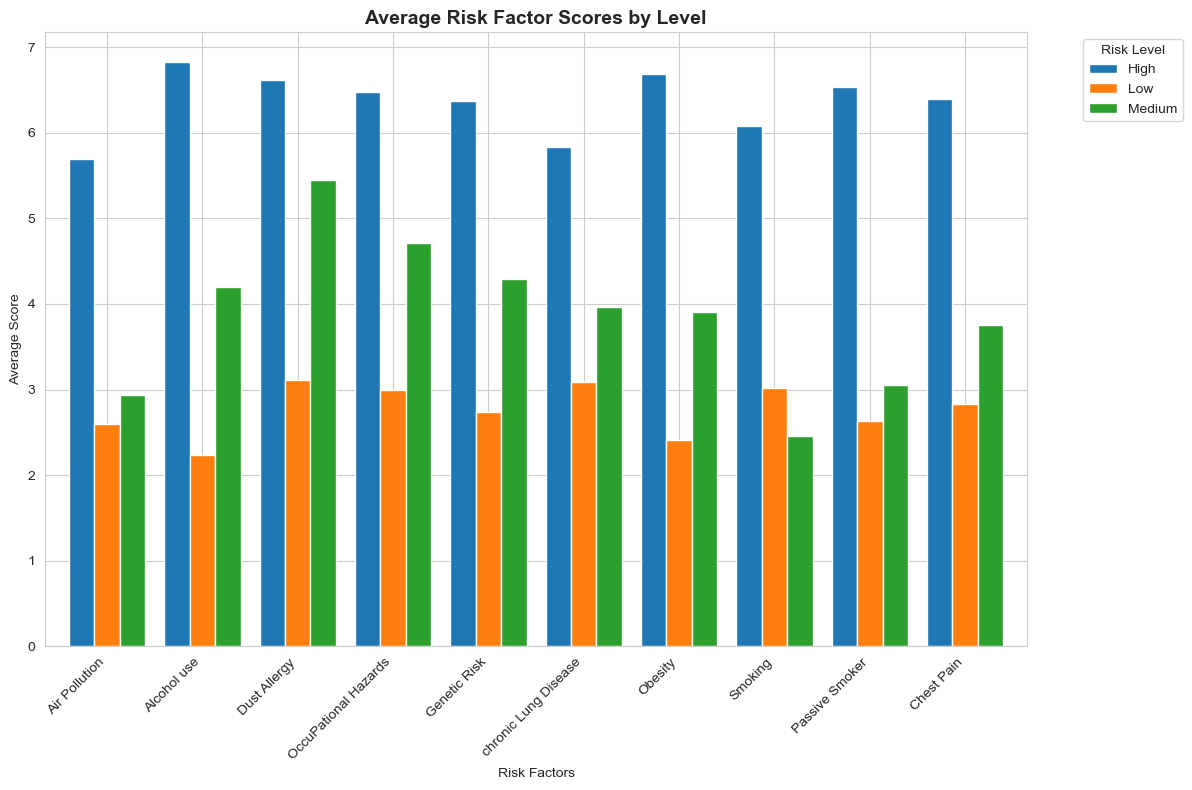

In [11]:
# Risk Factors Mean by Level
if 'Level' in df.columns and len(existing_risk_factors) > 0:
    print("=" * 60)
    print("AVERAGE RISK FACTOR SCORES BY LEVEL")
    print("=" * 60)
    
    level_means = df.groupby('Level')[existing_risk_factors[:10]].mean()
    print(level_means.round(2))
    
    # Visualization
    plt.figure(figsize=(14, 6))
    level_means.T.plot(kind='bar', width=0.8)
    plt.title('Average Risk Factor Scores by Level', fontsize=14, fontweight='bold')
    plt.xlabel('Risk Factors')
    plt.ylabel('Average Score')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Risk Level', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

KEY RISK FACTORS DISTRIBUTION


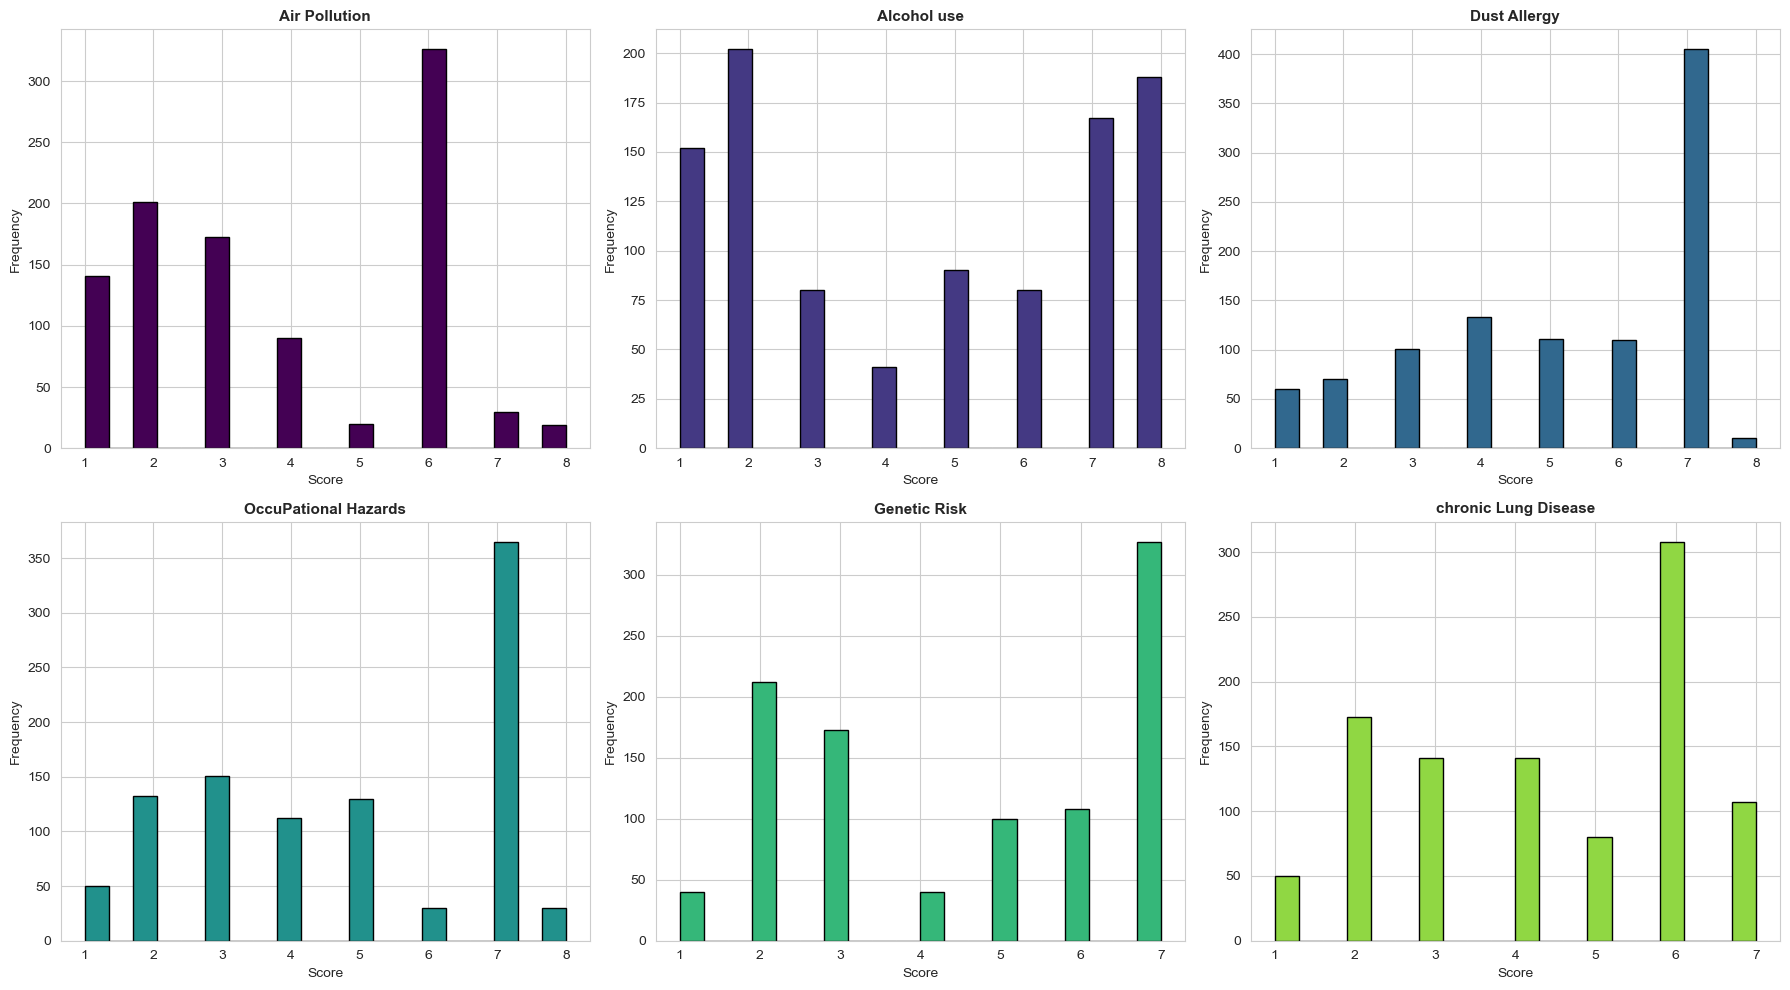

In [12]:
# Key Risk Factors Distribution
if len(existing_risk_factors) > 0:
    print("=" * 60)
    print("KEY RISK FACTORS DISTRIBUTION")
    print("=" * 60)
    
    # Select top 6 risk factors
    key_factors = existing_risk_factors[:6]
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()
    
    for idx, factor in enumerate(key_factors):
        df[factor].hist(bins=20, color=plt.cm.viridis(idx/len(key_factors)), 
                       edgecolor='black', ax=axes[idx])
        axes[idx].set_title(f'{factor}', fontsize=11, fontweight='bold')
        axes[idx].set_xlabel('Score')
        axes[idx].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

SMOKING ANALYSIS BY RISK LEVEL
Smoking    1   2    3   4   5   6    7   8
Level                                     
High       0  70    0  19   0  10  187  79
Low       61  81   71  40   0  30   20   0
Medium   120  71  101   0  10  20    0  10


<Figure size 1200x600 with 0 Axes>

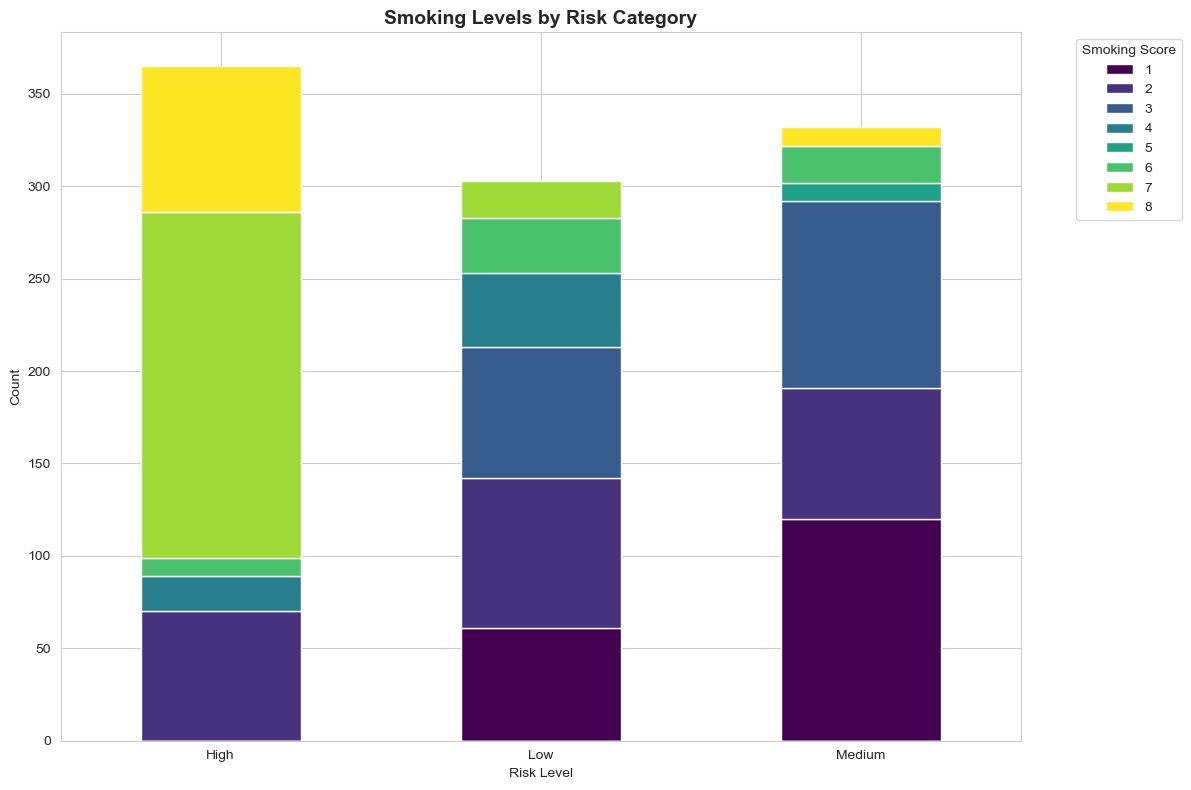

In [13]:
# Smoking Analysis
if 'Smoking' in df.columns and 'Level' in df.columns:
    print("=" * 60)
    print("SMOKING ANALYSIS BY RISK LEVEL")
    print("=" * 60)
    
    smoking_by_level = pd.crosstab(df['Level'], df['Smoking'])
    print(smoking_by_level)
    
    # Visualization
    plt.figure(figsize=(12, 6))
    smoking_by_level.plot(kind='bar', stacked=True, colormap='viridis')
    plt.title('Smoking Levels by Risk Category', fontsize=14, fontweight='bold')
    plt.xlabel('Risk Level')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.legend(title='Smoking Score', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

RISK FACTOR DISTRIBUTIONS BY LEVEL


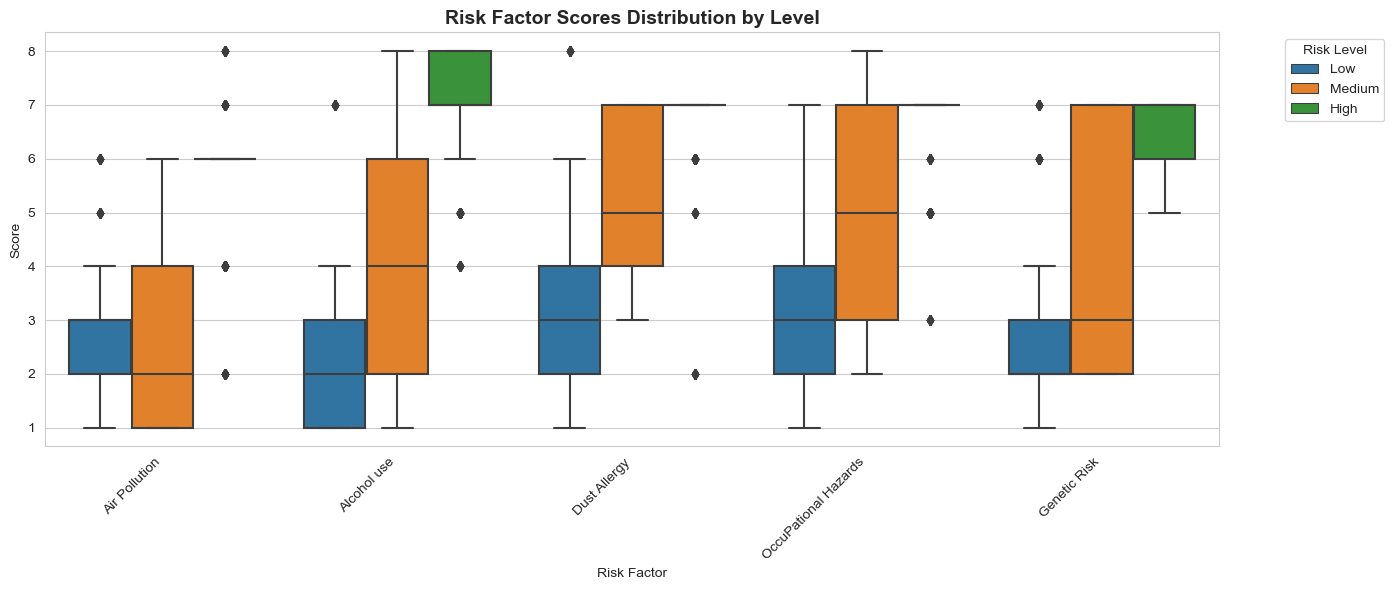

In [14]:
# Boxplot of Risk Factors by Level
if 'Level' in df.columns and len(existing_risk_factors) > 0:
    print("=" * 60)
    print("RISK FACTOR DISTRIBUTIONS BY LEVEL")
    print("=" * 60)
    
    # Select a few key risk factors for boxplot
    key_factors = existing_risk_factors[:5]
    df_melted = df.melt(id_vars=['Level'], 
                       value_vars=key_factors, 
                       var_name='Risk Factor', 
                       value_name='Score')
    
    plt.figure(figsize=(14, 6))
    sns.boxplot(data=df_melted, x='Risk Factor', y='Score', hue='Level')
    plt.title('Risk Factor Scores Distribution by Level', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Risk Level', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [15]:
# Summary Insights
print("=" * 60)
print("KEY INSIGHTS SUMMARY")
print("=" * 60)

if 'Level' in df.columns:
    print("\n1. Average Age by Risk Level:")
    age_by_level = df.groupby('Level')['Age'].mean()
    print(age_by_level.round(2))
    
    print("\n2. Risk Level Distribution:")
    print(f"   Low: {len(df[df['Level'] == 'Low'])} ({len(df[df['Level'] == 'Low'])/len(df)*100:.1f}%)")
    print(f"   Medium: {len(df[df['Level'] == 'Medium'])} ({len(df[df['Level'] == 'Medium'])/len(df)*100:.1f}%)")
    print(f"   High: {len(df[df['Level'] == 'High'])} ({len(df[df['Level'] == 'High'])/len(df)*100:.1f}%)")
    
    if len(existing_risk_factors) > 0:
        print("\n3. Top 5 Risk Factors with Highest Average Scores (High Risk Group):")
        high_risk_means = df[df['Level'] == 'High'][existing_risk_factors].mean().sort_values(ascending=False)
        print(high_risk_means.head().round(2))

print("\n" + "=" * 60)
print("EDA COMPLETE!")
print("=" * 60)

KEY INSIGHTS SUMMARY

1. Average Age by Risk Level:
Level
High      37.32
Low       35.41
Medium    38.62
Name: Age, dtype: float64

2. Risk Level Distribution:
   Low: 303 (30.3%)
   Medium: 332 (33.2%)
   High: 365 (36.5%)

3. Top 5 Risk Factors with Highest Average Scores (High Risk Group):
Coughing of Blood    7.44
Alcohol use          6.83
Obesity              6.68
Dust Allergy         6.62
Passive Smoker       6.53
dtype: float64

EDA COMPLETE!
